# Explore descriptive statistics

**Introduction**
Data professionals often use descriptive statistics to understand the data they are working with and provide collaborators with a summary of the relative location of values in the data, as well an information about its spread.

For this activity, you are a member of an analytics team for the United States Environmental Protection Agency (EPA). You are assigned to analyze data on air quality with respect to carbon monoxide, a major air pollutant. The data includes information from more than 200 sites, identified by state, county, city, and local site names. You will use Python functions to gather statistics about air quality, then share insights with stakeholders.

In [3]:
!mamba install pandas

mambajs 0.19.13

Specs: xeus-python, numpy, matplotlib, pillow, ipywidgets>=8.1.6, ipyleaflet, scipy, pandas
Channels: emscripten-forge, conda-forge

Solving environment...
Solving took 1.7445999999046327 seconds
  Name                          Version                       Build                         Channel                       
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
+ pandas                        3.0.0                         np22py313h9d9dc1e_0           emscripten-forge              
+ python-tzdata                 2025.3                        pyhd8ed1ab_0                  conda-forge                   
- pip                           25.3                          pyh145f28c_0                  conda-forge                   


In [4]:
#Import the relevant Python libraries pandas and numpy.
import pandas as pd
import numpy as np

Use the read_csv function from the pandas library. The index_col parameter can be set to 0 to read in the first column as an index (and to avoid "Unnamed: 0" appearing as a column in the resulting DataFrame).

In [7]:
# Import the file
epa_data = pd.read_csv("c4_epa_air_quality.csv", index_col = 0)
epa_data.head()

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,0.473684,7
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,0.263158,5
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,0.111111,2
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,0.300000,3
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,0.215789,3


**Question: What does the aqi column represent?**

The aqi column represents the EPA's Air Quality Index (AQI).

Now, get a table that contains some descriptive statistics about the data.

In [8]:
# Get descriptive stats.
epa_data.describe()

,arithmetic_mean,aqi
count,260.000000,260.000000
mean,0.403169,6.757692
std,0.317902,7.061707
min,0.000000,0.000000
25%,0.200000,2.000000
50%,0.276315,5.000000
75%,0.516009,9.000000
max,1.921053,50.000000


**Question: Based on the table of descriptive statistics, what do you notice about the count value for the aqi column?**

The count value for the aqi column is 260. This means there are 260 aqi measurements represented in this dataset.

**Question: What do you notice about the 25th percentile for the aqi column? This is an important measure for understanding where the aqi values lie.**

The 25th percentile for the aqi column is 2. This means that 25% of the aqi values in the data are below 2.

**Question: What do you notice about the 75th percentile for the aqi column? This is another important measure for understanding where the aqi values lie.**

The 75th percentile for the aqi column is 9. This means that 75% of the aqi values in the data are below 9.

In [9]:
# Get descriptive stats about the states in the data.
epa_data['state_name'].describe()

count            260
unique            52
top       California
freq              66
Name: state_name, dtype: object

**Question: What do you notice while reviewing the descriptive statistics about the states in the data?**
There are 260 state values, and 52 of them are unique. California is the most commonly occurring state in the data, with a frequency of 66. (In other words, 66 entries in the data correspond to aqi measurements taken in California.)

In [10]:
# Compute the mean value from the aqi column.
(epa_data["aqi"]).mean()

np.float64(6.757692307692308)

**Question: What do you notice about the mean value from the aqi column?**

The mean value for the aqi column is approximately 6.76 (rounding to 2 decimal places here). This means that the average aqi from the data is approximately 6.76.

In [11]:
# Compute the median value from the aqi column.
np.median(epa_data["aqi"])

np.float64(5.0)

In [12]:
# Identify the maximum value from the aqi column.
epa_data["aqi"].max()

np.int64(50)

In [13]:
# Identify the minimum value from the aqi column.
epa_data["aqi"].min()

np.int64(0)

In [14]:
# Compute the standard deviation for the aqi column.
np.std(epa_data["aqi"], ddof=1)

np.float64(7.061706678820724)

**Considerations**
What are some key takeaways that you learned during this lab? Functions in the pandas and numpy libraries can be used to find statistics that describe a dataset. The describe() function from pandas generates a table of descriptive statistics about numerical or categorical columns. The mean(), median(), min(), max(), and std() functions from numpy are useful for finding individual statistics about numerical data.

**How would you present your findings from this lab to others? Consider the following relevant points noted by AirNow.gov as you respond:**

"AQI values at or below 100 are generally thought of as satisfactory. When AQI values are above 100, air quality is considered to be unhealthy—at first for certain sensitive groups of people, then for everyone as AQI values increase."
"An AQI of 100 for carbon monoxide corresponds to a level of 9.4 parts per million."
The average AQI value in the data is approximately 6.76, which is considered safe with respect to carbon monoxide. Further, 75% of the AQI values are below 9.

**What summary would you provide to stakeholders? Use the same information provided previously from AirNow.gov as you respond.**

75% of the AQI values in the data are below 9, which is considered good air quality.
Funding should be allocated for further investigation of the less healthy regions in order to learn how to improve the conditions.

## Explore probability distributions

**Introduction**
The ability to determine which type of probability distribution best fits data, calculate z-score, and detect outliers are essential skills in data work. These capabilities enable data professionals to understand how their data is distributed and identify data points that need further examination.

The data includes information about more than 200 sites, identified by state, county, city, and local site names. One of the main goals is to determine which regions need support to make air quality improvements. Given that carbon monoxide is a major air pollutant, you will investigate data from the Air Quality Index (AQI) with respect to carbon monoxide.

In [17]:
# Import relevant libraries, packages, and modules.

import numpy as np
import pandas as pd

# for visualizations
import matplotlib.pyplot as plt 

# to calculate z-score
from scipy import stats
import statsmodels.api as sm

In [16]:
!mamba install statsmodels

mambajs 0.19.13

Specs: xeus-python, numpy, matplotlib, pillow, ipywidgets>=8.1.6, ipyleaflet, scipy, pandas, statsmodels
Channels: emscripten-forge, conda-forge

Solving environment...
Solving took 0.8842999999523162 seconds
  Name                          Version                       Build                         Channel                       
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
+ patsy                         1.0.2                         py313h1804a44_0               emscripten-forge              
+ statsmodels                   0.14.6                        np22py313h3cf259a_0           emscripten-forge              


In [18]:
# Load the data
df = pd.read_csv("modified_c4_epa_air_quality.csv")
df.head()

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,2.079442
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,1.791759
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,1.098612
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,1.386294
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,1.386294


The aqi_log column represents AQI readings that were transformed logarithmically to suit the objectives.

To better understand the quantity of data you are working with, display the number of rows and the number of columns.

In [19]:
# Display number of rows, number of columns.
df.shape

(260, 8)

Find out whether aqi_log fits a specific type of probability distribution. Create a histogram to visualize the distribution of aqi_log. Then, based on its shape, visually determine if it resembles a particular distribution.

<Axes: >

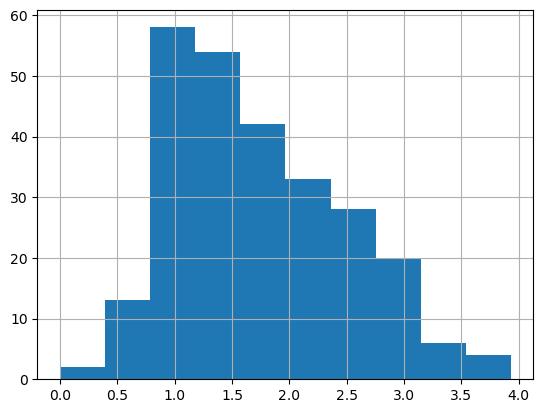

In [20]:
# Create a histogram to visualize distribution of aqi_log.
df["aqi_log"].hist()

There is a slight right skew, but it still appears to be a bell shape. This shape suggests that the distribution of this data should be approximately normal.

**Statistical tests**
Use the empirical rule to observe the data, then test and verify that it is normally distributed.

68% of the data fall within 1 standard deviation of the mean
95% of the data fall within 2 standard deviations of the mean
99.7% of the data fall within 3 standard deviations of the mean

In [22]:
# Define variable for aqi_log mean.
mean_aqi_log = df["aqi_log"].mean()
print(mean_aqi_log)

1.7669210929985582


In [24]:
# Define variable for aqi_log standard deviation.
std_aqi_log = df["aqi_log"].std()
print(std_aqi_log)

0.7147155520223721


Now, check the first part of the empirical rule: whether 68% of the aqi_log data falls within 1 standard deviation of the mean.

To compute the actual percentage of the data that satisfies this criteria, define the lower limit (for example, 1 standard deviation below the mean) and the upper limit (for example, 1 standard deviation above the mean). This will enable you to create a range and confirm whether each value falls within it.

In [25]:
# Define variable for lower limit, 1 standard deviation below the mean.
lower_limit = mean_aqi_log - 1 * std_aqi_log

# Define variable for upper limit, 1 standard deviation above the mean.
upper_limit = mean_aqi_log + 1 * std_aqi_log

# Display lower_limit, upper_limit.
print(lower_limit, upper_limit)

1.052205540976186 2.4816366450209304


In [28]:
# Display the actual percentage of data that falls within 1 standard deviation of the mean.
((df["aqi_log"] >= lower_limit) & (df["aqi_log"] <= upper_limit)).mean() * 100

np.float64(76.15384615384615)

Now, consider the second part of the empirical rule: whether 95% of the aqi_log data falls within 2 standard deviations of the mean.

To compute the actual percentage of the data that satisfies this criteria, define the lower limit (for example, 2 standard deviations below the mean) and the upper limit (for example, 2 standard deviations above the mean). This will enable you to create a range and confirm whether each value falls within it.

In [29]:
# Define variable for lower limit, 2 standard deviation below the mean.
lower_limit = mean_aqi_log - 2 * std_aqi_log

# Define variable for upper limit, 2 standard deviation above the mean.
upper_limit = mean_aqi_log + 2 * std_aqi_log

# Display lower_limit, upper_limit.
print(lower_limit, upper_limit)

0.3374899889538139 3.1963521970433026


In [31]:
# Display the actual percentage of data that falls within 2 standard deviations of the mean.
((df["aqi_log"] >= lower_limit) & (df["aqi_log"] <= upper_limit)).mean() * 100

np.float64(95.76923076923077)

Now, consider the third part of the empirical rule:whether 99.7% of the aqi_log data falls within 3 standard deviations of the mean.

To compute the actual percentage of the data that satisfies this criteria, define the lower limit (for example, 3 standard deviations below the mean) and the upper limit (for example, 3 standard deviations above the mean). This will enable you to create a range and confirm whether each value falls within it.

In [32]:
# Define variable for lower limit, 3 standard deviations below the mean.
lower_limit = mean_aqi_log - 3 * std_aqi_log

# Define variable for upper limit, 3 standard deviations above the mean.
upper_limit = mean_aqi_log + 3 * std_aqi_log

print(lower_limit, upper_limit)

-0.37722556306855815 3.9110677490656744


In [34]:
# Display the actual percentage of data that falls within 3 standard deviations of the mean.

((df["aqi_log"] >= lower_limit) & (df["aqi_log"] <= upper_limit)).mean() * 100

np.float64(99.61538461538461)

**a) results after applying the empirical rule:**

About 76.15% of the data falls within 1 standard deviation of the mean.
About 95.77% of the data falls within 2 standard deviation of the mean.
About 99.62% of the data falls within 3 standard deviations of the mean.
Note: The 95.77% is very close to 95%, and the 99.62% is very close to 99.7%. The 76.15% is not as close to 68%, but relatively close. Overall, from applying the empirical rule, the data appears to be not exactly normal, but could be considered approximately normal.

**b) Using z-score to find outliers:**

Since z-score indicates the relative position of values (for instance, z-score measures how many standard deviations below or above the mean a data point is), it can be used to detect outliers.

Z-score could be used to identify values that lie more than 3 standard deviations below or above the mean. These values may be considered outliers.

Compute the z-score for every aqi_log value. Then, add a column named z_score in the data to store those results.

In [35]:
# Compute the z-score for every aqi_log value, and add a column named z_score in the data to store those results.
# Degrees of freedom correction in the calculation of the standard deviation. Default is 0
df["z_score"] = stats.zscore(df["aqi_log"],ddof = 1)
df.head()

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log,z_score
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,2.079442,0.437265
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,1.791759,0.034753
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,1.098612,-0.935070
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,1.386294,-0.532557
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,1.386294,-0.532557


Use ddof=0 when you have the entire population

Use ddof=1 when you have a sample and want an unbiased estimate

In [37]:
# Display data where `aqi_log` is above or below 3 standard deviations of the mean
# use a mask to filter data

df[(df["z_score"] < -3) | (df["z_score"] > 3 )]

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log,z_score
244,2018-01-01,Arizona,Maricopa,Phoenix,WEST PHOENIX,Carbon monoxide,Parts per million,3.931826,3.029044


Note: The aqi_log for West Phoenix is slightly above 3 standard deviations of the mean. This means that the air quality at that site is worse than the rest of the sites represented in the data.

Detecting outliers is important because they can reveal two important things, depending on the context: First, they can identify measurements that were taken incorrectly. Second, they can highlight parts of the data that can be focused on to make improvements.

For example, if the aqi_log for West Phoenix is considered an outlier, then that site can be studied further to determine what practices or changes might improve the air quality.

**Key takeaways:**

Plotting the data using a histogram, then observing the shape, enables you to visually determine whether the data is normally distributed.
The empirical rule can be used to verify whether a distribution is normal.
The mean and standard deviation are important measures when applying the empirical rule to a distribution.
Z-score allows you to identify potenial outliers in the data.

**Summary of findings**

The distribution of the aqi_log data is approximately normal.
Using statistical methods, it was determined that the site at West Phoenix has worse air quality than the other sites.
Consider allocating more resources toward further examining this site in order to improve its air quality.